# MCIT Amazon Product Reviews Use Case 2 

#### In this notebook, we need to classify reviews as positive or negative for dataset about amazon product reviews, so we will make NLP then build, train and evaluate ML model to predict customers reviews as positive or negative.

#### Here are the main steps we will go through:

<a href="#1">1.Read the dataset</a><br>
<a href="#2">2.Explore the dataset </a><br>
<a href="#3">3.Natural Language Processing </a><br>
<a href="#4">4.Select a model and train it</a><br>


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
from scipy import stats
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

## <a name="1">1. Read the dataset</a>
(<a href="#0">Go to top</a>)

Let's read the dataset into a dataframe, using Pandas.

In [3]:
df = pd.read_csv('1429_1.csv')
df.head()

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",NaN,TRUE,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",NaN,TRUE,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",NaN,TRUE,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",NaN,TRUE,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",NaN,TRUE,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42


## <a name="2">2. Explore the dataset</a>
(<a href="#0">Go to top</a>)

Let's explore the dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29789 entries, 0 to 29788
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    29789 non-null  object 
 1   name                  27900 non-null  object 
 2   asins                 29787 non-null  object 
 3   brand                 29789 non-null  object 
 4   categories            29789 non-null  object 
 5   keys                  29789 non-null  object 
 6   manufacturer          29789 non-null  object 
 7   reviews.date          29755 non-null  object 
 8   reviews.dateAdded     19199 non-null  object 
 9   reviews.dateSeen      29789 non-null  object 
 10  reviews.didPurchase   1 non-null      object 
 11  reviews.doRecommend   29230 non-null  object 
 12  reviews.id            1 non-null      float64
 13  reviews.numHelpful    29286 non-null  float64
 14  reviews.rating        29755 non-null  float64
 15  reviews.sourceURLs 

In [5]:
df.shape

(29789, 21)

Since we are interested in 'reviews.text','reviews.rating' columns

In [6]:
df_review = df[['reviews.text','reviews.rating']]

In [7]:
df_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29789 entries, 0 to 29788
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   reviews.text    29787 non-null  object 
 1   reviews.rating  29755 non-null  float64
dtypes: float64(1), object(1)
memory usage: 465.6+ KB


In [8]:
df_review.shape

(29789, 2)

In [9]:
df_review.isna().sum()

reviews.text       2
reviews.rating    34
dtype: int64

In [10]:
df_review = df_review.dropna()

In [11]:
df_review.isna().sum()

reviews.text      0
reviews.rating    0
dtype: int64

In [12]:
df_review.shape

(29754, 2)

In [13]:
df_review.duplicated().sum()

0

In [14]:
df_review.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29754 entries, 0 to 29787
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   reviews.text    29754 non-null  object 
 1   reviews.rating  29754 non-null  float64
dtypes: float64(1), object(1)
memory usage: 697.4+ KB


In [15]:
df_review['reviews.rating'].value_counts()

5.0    20015
4.0     7638
3.0     1371
2.0      370
1.0      360
Name: reviews.rating, dtype: int64

Since we will consider ratings 5, 4 are positive and the rest negative

In [16]:
df_review['reviews.rating'] = df_review['reviews.rating'].apply(lambda x: 1 if x == 5 or x == 4 else 0)

In [17]:
df_review['reviews.rating'].value_counts()

1    27653
0     2101
Name: reviews.rating, dtype: int64

We should  notice that we have imbalanced dataset

## <a name="3">3. Natural Language Processing</a>
(<a href="#0">Go to top</a>)

Let's clean our text data

In [18]:
import re, string
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [19]:
def clean(df):

    df = df.apply(lambda x: re.sub('[^a-zA-Z]', ' ', x))
    #Lowercase our text
    df = df.apply(lambda x: x.lower())
    #Get rid of leading / trailing whitespace
    df = df.apply(lambda x: x.split())
    #Remove HTML tags / markups
    df = df.apply(lambda x: re.compile('<.*?>').sub('', str(x)))  
    #Replace punctuation with space       
    df = df.apply(lambda x: re.compile('[%s]' % re.escape(string.punctuation)).sub(' ',str(x)))
    #Remove extra space and tabs
    df = df.apply(lambda x: re.sub('\s+', ' ', x))
    
    
    snow = SnowballStemmer('english')
    #ps = PorterStemmer()
    #Remove not from stopwords
    all_stopwords = stopwords.words('english')
    all_stopwords.remove('not')    

    df = df.apply(lambda sentence: ' '.join([snow.stem(word) for word in nltk.word_tokenize(sentence) if not word in set(all_stopwords)]))
    #df_review['reviews.text'] = df_review['reviews.text'].apply(lambda sentence: ' '.join([word for word in nltk.word_tokenize(sentence) if not word in set(all_stopwords)]))

    
    # Initialize the lemmatizer
    wl = WordNetLemmatizer()

    # This is a helper function to map NTLK position tags
    # Full list is available here: https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html
    def get_wordnet_pos(tag):
        if tag.startswith('J'):
            return wordnet.ADJ
        elif tag.startswith('V'):
            return wordnet.VERB
        elif tag.startswith('N'):
            return wordnet.NOUN
        elif tag.startswith('R'):
            return wordnet.ADV
        else:
            return wordnet.NOUN

    df = df.apply(lambda sentence: ' '.join([wl.lemmatize(tag[0], get_wordnet_pos(tag[1])) for idx, tag in enumerate(nltk.pos_tag(word_tokenize(sentence)))]))

    return df

In [20]:
df_review['reviews.text'] = clean(df_review['reviews.text'] )
df_review['reviews.text'] 

0        product far not disappoint child love use like...
1              great beginn experienc person buy gift love
2        inexpens tablet use learn step nabi thrill lea...
3        fire hd two week love tablet great valu prime ...
4        buy grand daughter come visit set user enter a...
                               ...                        
29783    buy stream medium hd k work great bad thing ne...
29784    bunch stick honest like box well run much fast...
29785    unplug famili multipl devic kindl ipad roku et...
29786          buy util playstaion vue cut cabl work great
29787    look add smart tv capabl tv replac exist smart...
Name: reviews.text, Length: 29754, dtype: object

In [ ]:
# df_review['reviews.text'] = df_review['reviews.text'].apply(lambda x: re.sub('[^a-zA-Z]', ' ', x))
# #Lowercase our text
# df_review['reviews.text'] = df_review['reviews.text'].apply(lambda x: x.lower())
# #Get rid of leading / trailing whitespace
# df_review['reviews.text'] = df_review['reviews.text'].apply(lambda x: x.split())
# #Remove HTML tags / markups
# df_review['reviews.text'] = df_review['reviews.text'].apply(lambda x: re.compile('<.*?>').sub('', str(x)))  
# #Replace punctuation with space       
# df_review['reviews.text'] = df_review['reviews.text'].apply(lambda x: re.compile('[%s]' % re.escape(string.punctuation)).sub(' ',str(x)))
# #Remove extra space and tabs
# df_review['reviews.text'] = df_review['reviews.text'].apply(lambda x: re.sub('\s+', ' ', x))


In [ ]:
# snow = SnowballStemmer('english')
# #ps = PorterStemmer()
# #Remove not from stopwords
# all_stopwords = stopwords.words('english')
# all_stopwords.remove('not')    

# df_review['reviews.text'] = df_review['reviews.text'].apply(lambda sentence: ' '.join([snow.stem(word) for word in nltk.word_tokenize(sentence) if not word in set(all_stopwords)]))
# #df_review['reviews.text'] = df_review['reviews.text'].apply(lambda sentence: ' '.join([word for word in nltk.word_tokenize(sentence) if not word in set(all_stopwords)]))
    

In [ ]:
# # Importing the necessary functions
# import nltk
# from nltk.tokenize import word_tokenize
# from nltk.corpus import wordnet
# from nltk.stem import WordNetLemmatizer

# # Initialize the lemmatizer
# wl = WordNetLemmatizer()

# # This is a helper function to map NTLK position tags
# # Full list is available here: https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html
# def get_wordnet_pos(tag):
#     if tag.startswith('J'):
#         return wordnet.ADJ
#     elif tag.startswith('V'):
#         return wordnet.VERB
#     elif tag.startswith('N'):
#         return wordnet.NOUN
#     elif tag.startswith('R'):
#         return wordnet.ADV
#     else:
#         return wordnet.NOUN

# df_review['reviews.text'] = df_review['reviews.text'].apply(lambda sentence: ' '.join([wl.lemmatize(tag[0], get_wordnet_pos(tag[1])) for idx, tag in enumerate(nltk.pos_tag(word_tokenize(sentence)))]))

In [ ]:
# def get_wordnet_pos(word):
#     tag = nltk.pos_tag([word])[0][1][0].upper()
#     tag_dict = {"J": wordnet.ADJ,
#                 "N": wordnet.NOUN,
#                 "V": wordnet.VERB,
#                 "R": wordnet.ADV}

#     return tag_dict.get(tag, wordnet.NOUN)


# # 1. Init Lemmatizer
# lemmatizer = WordNetLemmatizer()

# # Lemmatize a Sentence with the appropriate POS tag
# df_review['reviews.text'] = df_review['reviews.text'].apply(lambda sentence: ' '.join([lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in nltk.word_tokenize(sentence)]))


In [ ]:
# #Another way of Lemmatization using spacy
# import spacy

# # Initialize spacy 'en' model, keeping only tagger component needed for lemmatization
# nlp = spacy.load('en', disable=['parser', 'ner'])

# #sentence = df_review['reviews.text'][0]

# # Parse the sentence using the loaded 'en' model object `nlp`
# #doc = nlp(sentence)

# # Extract the lemma for each token and join
# df_review['reviews.text'] = df_review['reviews.text'].apply(lambda sentence:' '.join([token.lemma_ for token in nlp(sentence)]))
# #> 'the strip bat be hang on -PRON- foot for good'


In [21]:
df_review.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29754 entries, 0 to 29787
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   reviews.text    29754 non-null  object
 1   reviews.rating  29754 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 697.4+ KB


## <a name="4">4. Select a model and train it</a>
(<a href="#0">Go to top</a>)


In [ ]:
X = df_review['reviews.text']
y = df_review['reviews.rating'] 
X

0        product far not disappoint child love use like...
1              great beginn experienc person buy gift love
2        inexpens tablet use learn step nabi thrill lea...
3        fire hd two week love tablet great valu prime ...
4        buy grand daughter come visit set user enter a...
                               ...                        
34655    not appreci faster high amp charger use kindl ...
34656    amazon includ charger kindl fact charg u extra...
34657    love kindl fire realli disappoint kindl power ...
34658    surpris find not come type charg cord purchas ...
34659    spite fact noth good thing say amazon anth eve...
Name: reviews.text, Length: 34626, dtype: object

Let's split our data 

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=23)

In [ ]:
print ('Train Set Shape\t\t:{}\nTest Set Shape\t\t:{}'.format(X_train.shape, X_test.shape))

Train Set Shape		:(27700,)
Test Set Shape		:(6926,)


### Using CountVectorizer

In [ ]:
# from sklearn.feature_extraction.text import CountVectorizer
# # Create the word vector with CountVectorizer
# count_vect = CountVectorizer(ngram_range=(1,1))
# X_train = count_vect.fit_transform(X_train)
# X_train = X_train.toarray()
# X_test = count_vect.transform(X_test)
# X_test = X_test.toarray()

In [ ]:
# # Print vocabulary length
# print('Vocabulary length :', len(count_vect.get_feature_names()))

Vocabulary length : 8063


In [ ]:
# # Assign feature names of vector into a variable
# vocab = count_vect.get_feature_names()

In [ ]:
# # Dataframe for train countvectorizer dataset
# pd.DataFrame(X_train, columns = vocab).head()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_train = X_train.toarray()
X_test = vectorizer.transform(X_test)
X_test = X_test.toarray()

In [ ]:
# Print vocabulary length
print('Vocabulary length :', len(vectorizer.get_feature_names()))

Vocabulary length : 8063


In [ ]:
# Assign feature names of vector into a variable
vocab = vectorizer.get_feature_names()

In [ ]:
# Dataframe for train countvectorizer dataset
pd.DataFrame(X_train, columns = vocab).head()

aa  aaa  aamazon  aand  abandon  abc  abcmous  abd  abil  abilti  abk  \
0  0.0  0.0      0.0   0.0      0.0  0.0      0.0  0.0   0.0     0.0  0.0   
1  0.0  0.0      0.0   0.0      0.0  0.0      0.0  0.0   0.0     0.0  0.0   
2  0.0  0.0      0.0   0.0      0.0  0.0      0.0  0.0   0.0     0.0  0.0   
3  0.0  0.0      0.0   0.0      0.0  0.0      0.0  0.0   0.0     0.0  0.0   
4  0.0  0.0      0.0   0.0      0.0  0.0      0.0  0.0   0.0     0.0  0.0   

   abl  abod  abook  abound  abount  aboutjust  abroad  absofb  absoluit  \
0  0.0   0.0    0.0     0.0     0.0        0.0     0.0     0.0       0.0   
1  0.0   0.0    0.0     0.0     0.0        0.0     0.0     0.0       0.0   
2  0.0   0.0    0.0     0.0     0.0        0.0     0.0     0.0       0.0   
3  0.0   0.0    0.0     0.0     0.0        0.0     0.0     0.0       0.0   
4  0.0   0.0    0.0     0.0     0.0        0.0     0.0     0.0       0.0   

   absolut  absoutley  abt  abund  abus  abysm   ac  academ  acc  acced  \
0      0.0        0.0  0.0    0.0   0.0    0.0  0.0     0.0  0.0    0.0   
1      0.0        0.0  0.0    0.0   0.0    0.0  0.0     0.0  0.0    0.0   
2      0.0        0.0  0.0    0.0   0.0    0.0  0.0     0.0  0.0    0.0   
3      0.0        0.0  0.0    0.0   0.0    0.0  0.0     0.0  0.0    0.0   
4      0.0        0.0  0.0    0.0   0.0    0.0  0.0     0.0  0.0    0.0   

   acceler  acceleromet  accent  accept  acceri  acces  accesori  access  \
0      0.0          0.0     0.0     0.0     0.0    0.0       0.0     0.0   
1      0.0          0.0     0.0     0.0     0.0    0.0       0.0     0.0   
2      0.0          0.0     0.0     0.0     0.0    0.0       0.0     0.0   
3      0.0          0.0     0.0     0.0     0.0    0.0       0.0     0.0   
4      0.0          0.0     0.0     0.0     0.0    0.0       0.0     0.0   

   accessbl  accessori  accid  accident  acclim  accommod  accomod  accompani  \
0       0.0        0.0    0.0       0.0     0.0       0.0      0.0        0.0   
1       0.0        0.0    0.0       0.0     0.0       0.0      0.0        0.0   
2       0.0        0.0    0.0       0.0     0.0       0.0      0.0        0.0   
3       0.0        0.0    0.0       0.0     0.0       0.0      0.0        0.0   
4       0.0        0.0    0.0       0.0     0.0       0.0      0.0        0.0   

   accomplish  accord  account  acct  accumul  accupi  accur  accuraci  \
0         0.0     0.0      0.0   0.0      0.0     0.0    0.0       0.0   
1         0.0     0.0      0.0   0.0      0.0     0.0    0.0       0.0   
2         0.0     0.0      0.0   0.0      0.0     0.0    0.0       0.0   
3         0.0     0.0      0.0   0.0      0.0     0.0    0.0       0.0   
4         0.0     0.0      0.0   0.0      0.0     0.0    0.0       0.0   

   accurr  accustom  ace  acer  acess  achat  acheiv  achi  achiev  acord  \
0     0.0       0.0  0.0   0.0    0.0    0.0     0.0   0.0     0.0    0.0   
1     0.0       0.0  0.0   0.0    0.0    0.0     0.0   0.0     0.0    0.0   
2     0.0       0.0  0.0   0.0    0.0    0.0     0.0   0.0     0.0    0.0   
3     0.0       0.0  0.0   0.0    0.0    0.0     0.0   0.0     0.0    0.0   
4     0.0       0.0  0.0   0.0    0.0    0.0     0.0   0.0     0.0    0.0   

   acorn  acoust  acquaint  acquir  acrobat  across  act  action  activ  \
0    0.0     0.0       0.0     0.0      0.0     0.0  0.0     0.0    0.0   
1    0.0     0.0       0.0     0.0      0.0     0.0  0.0     0.0    0.0   
2    0.0     0.0       0.0     0.0      0.0     0.0  0.0     0.0    0.0   
3    0.0     0.0       0.0     0.0      0.0     0.0  0.0     0.0    0.0   
4    0.0     0.0       0.0     0.0      0.0     0.0  0.0     0.0    0.0   

   activit  actor  actress  actual  acur   ad  adag  adapt  adaptor  adaqu  \
0      0.0    0.0      0.0     0.0   0.0  0.0   0.0    0.0      0.0    0.0   
1      0.0    0.0      0.0     0.0   0.0  0.0   0.0    0.0      0.0    0.0   
2      0.0    0.0      0.0     0.0   0.0  0.0   0.0    0.0      0.0    0.0   
3      0.0    0.0 

### Using Naiv Bayes Classifier

In [ ]:
from sklearn.naive_bayes import MultinomialNB
naive = MultinomialNB()
naive.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [22]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

def predict(predictor, features, labels):
    """
    predictor : Predictor object of model
    features: Input features to model
    label: Ground truth target values
    """
    predictions = predictor.predict(features)

    # Calculate accuracy
    accuracy = (predictions == labels).sum() / labels.shape[0]
    print(f'Accuracy: {accuracy}')
    
    auc = roc_auc_score(labels, predictions)
    print(f'AUC     : {auc}')
    
    precision, recall, f1_score, _ = precision_recall_fscore_support(labels, predictions, average = 'binary')
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'F1_score: {f1_score}')
    
    
    confusion_matrix = pd.crosstab(index=labels, columns=predictions, rownames=['Actual'], colnames=['Predicted']).astype(int)
    sns.heatmap(confusion_matrix, annot=True, fmt='.0f', cmap="YlGnBu").set_title('Confusion Matrix') 


Accuracy: 0.9341516245487365
AUC     : 0.5055773975353742
Precision: 0.9343379589476727
Recall: 0.9997293326115536
F1_score: 0.9659281951656891


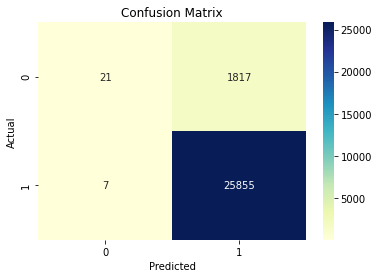

In [ ]:
predict(naive, X_train, y_train)

Accuracy: 0.9317066127634999
AUC     : 0.5
Precision: 0.9317066127634999
Recall: 1.0
F1_score: 0.9646460871515061


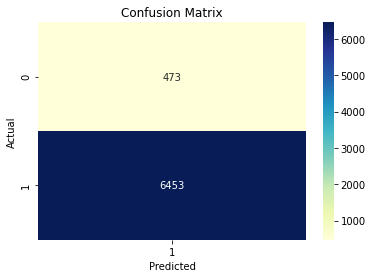

In [ ]:
predict(naive, X_test, y_test)

In [ ]:
#Using XGBoost Classifier
from xgboost import XGBClassifier
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

Accuracy: 0.9401083032490974
AUC     : 0.559054991720094
Precision: 0.9410328364736325
Recall: 0.9984146624390998
F1_score: 0.9688748803962401


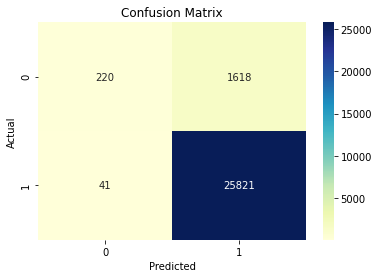

In [ ]:
predict(xgb_model, X_train, y_train)

Accuracy: 0.9369044181345654
AUC     : 0.5507897567350715
Precision: 0.9382284382284383
Recall: 0.9979854331318766
F1_score: 0.9671848013816925


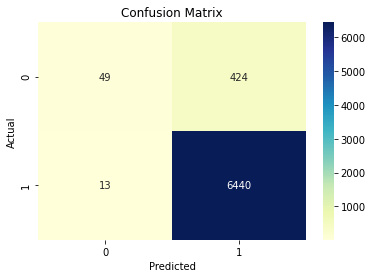

In [ ]:
predict(xgb_model, X_test, y_test)

### Trying oversampling (SMOTE) 

Since we have imbalanced data let's try overampling and watch our model performance

Here we use the cleaned data

In [23]:
df_review_sm = df_review[['reviews.text','reviews.rating']]
df_review_sm.head()

,reviews.text,reviews.rating
0,product far not disappoint child love use like...,1
1,great beginn experienc person buy gift love,1
2,inexpens tablet use learn step nabi thrill lea...,1
3,fire hd two week love tablet great valu prime ...,1
4,buy grand daughter come visit set user enter a...,1


In [24]:
df_review_sm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29754 entries, 0 to 29787
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   reviews.text    29754 non-null  object
 1   reviews.rating  29754 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 697.4+ KB


In [25]:
X_sm = df_review_sm['reviews.text']
y_sm = df_review_sm['reviews.rating']

In [26]:
from sklearn.model_selection import train_test_split
X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X_sm, y_sm, test_size=0.2, shuffle=True, random_state=23)

In [27]:
print ('Train Set Shape\t\t:{}\nTest Set Shape\t\t:{}'.format(X_train_sm.shape, X_test_sm.shape))

Train Set Shape		:(23803,)
Test Set Shape		:(5951,)


Using CountVectorizer

In [ ]:
# from sklearn.feature_extraction.text import CountVectorizer
# # Create the word vector with CountVectorizer
# count_vect_sm = CountVectorizer(ngram_range=(1,1))
# X_train_sm = count_vect_sm.fit_transform(X_train_sm)
# X_train_sm = X_train_sm.toarray()
# X_test_sm = count_vect_sm.transform(X_test_sm)
# X_test_sm = X_test_sm.toarray()

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X_train_sm = vectorizer.fit_transform(X_train_sm)
X_train_sm = X_train_sm.toarray()
X_test_sm = vectorizer.transform(X_test_sm)
X_test_sm = X_test_sm.toarray()

In [29]:
X_train_sm.shape

(23803, 7446)

Since testing data should be a way from our trained model, we will do oversampling only on training data 

In [30]:
from imblearn.over_sampling import SMOTE 
from sklearn.utils import shuffle

sm = SMOTE(random_state=42)
X_train_sm, y_train_sm = sm.fit_resample(X_train_sm, y_train_sm)
X_train_sm, y_train_sm = shuffle(X_train_sm, y_train_sm)



In [31]:
X_train_sm.shape, y_train_sm.shape

((44266, 7446), (44266,))

Using Naive Bayes Classifier

In [32]:
from sklearn.naive_bayes import MultinomialNB
naive_sm = MultinomialNB()
naive_sm.fit(X_train_sm, y_train_sm)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
# #Using XGBoost Classifier
# from xgboost import XGBClassifier
# xgb_model_sm = XGBClassifier()
# xgb_model_sm.fit(X_train_sm, y_train_sm)

Accuracy: 0.8654949622735282
AUC     : 0.8654949622735282
Precision: 0.8700425415122821
Recall: 0.8593502914200515
F1_score: 0.864663363185889


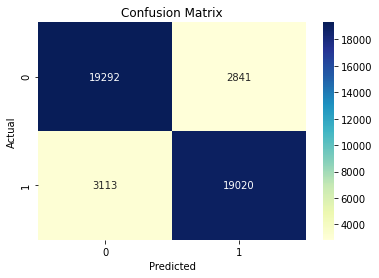

In [33]:
predict(naive_sm, X_train_sm, y_train_sm)
# predict(xgb_model_sm, X_train_sm, y_train_sm)

Accuracy: 0.8371702234918501
AUC     : 0.7828171760987255
Precision: 0.9747548508241185
Recall: 0.8463768115942029
F1_score: 0.9060409192281585


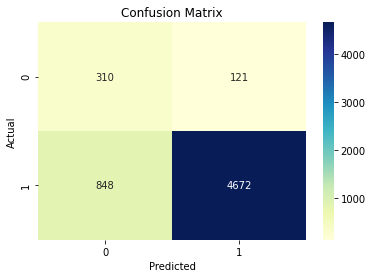

In [34]:
predict(naive_sm, X_test_sm, y_test_sm)
# predict(xgb_model_sm, X_test_sm, y_test_sm)

In [49]:
# # Testing my model
# import pandas as pd
# text = [" I was disappointed about this product? , I was expecting better quality than this.....! ",
#         "Pretty good product.....",
#         "I'd like to change this product, since it's not working well",
#         "I bought the tv last month... its incredibly working well, my wife likes it too much",
#         "I'm not gonna this mark again it's very bad I want my money back",
#        ]
# df_rev = pd.DataFrame(text, columns=['review'])
# df_rev.to_csv('test.csv', index=False)

In [50]:
df_rev_test = pd.read_csv('test.csv')
df_rev_test

,review
0,"I was disappointed about this product? , I wa..."
1,Pretty good product.....
2,"I'd like to change this product, since it's no..."
3,I bought the tv last month... its incredibly w...
4,I'm not gonna this mark again it's very bad I ...


In [51]:
rev['review'] = clean(df_rev_test['review'])
rev

,review
0,disappoint product expect good qualiti
1,pretti good product
2,like chang product sinc not work well
3,buy tv last month incred work well wife like much
4,not gon na mark bad want money back


In [52]:
my_test = vectorizer.transform(rev['review'])
my_test = my_test.toarray()
my_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [53]:
predictions = naive_sm.predict(my_test)
predictions

array([0, 0, 0, 1, 0])

In [54]:
from collections import OrderedDict

reviews = []
sentiments = []

for i in range(len(df_rev_test)):
    review = df_rev_test['review'][i]
    reviews.append(review)
    sentiments.append(predictions[i])

result = pd.DataFrame(OrderedDict( {
            'reviews': reviews
         , 'sentiment': sentiments
         }))
result.head()


,reviews,sentiment
0,"I was disappointed about this product? , I wa...",0
1,Pretty good product.....,0
2,"I'd like to change this product, since it's no...",0
3,I bought the tv last month... its incredibly w...,1
4,I'm not gonna this mark again it's very bad I ...,0


In [55]:
result.to_csv('result.csv', index=False)